# Import libraries

In [1]:
import pandas as pd
import numpy as np
from functions.model import *
from functions.vectorization import *
from functions.vocabulary import *
from functions.labelization import *

2023-09-05 10:11:40.527572: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-05 10:11:41.676373: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-05 10:11:41.680626: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-05 10:11:43.681324: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


# Define train query

In [2]:
train_query="SELECT"

# Import id->label

In [3]:
dict_label_ids = load_dict_label_ids('../data/train/ids_labels.json')

# Import vectors

In [4]:
path_df_train = '../data/train/TRAIN_filter_100_signature.json'
path_new_model = '../model/my_model_V6.h5'
df_train = pd.read_json(path_df_train)
vectorized_dataframe = load_vectorized_dataframe('../data/train/df_train_vectorized.npy')
df_train.columns = map(str.upper, df_train.columns)
train_ids = df_train['ID_PUESTO_ESCO_ULL']

# Get input dimension of model

In [5]:
vocabulary = load_vocabulary('../data/train/vocabulary.json')
input_dimension = get_vocabulary_dimension(vocabulary)

# Get output dimension of the model

In [6]:
output_dimension = get_dict_dimension(dict_label_ids)

# Create model

In [7]:
model = create_model(input_dimension, output_dimension)

# Train model

In [8]:
# Convert vectorized dataframe to np.vstack
vector_array = np.vstack(vectorized_dataframe)
train_labels_array = cast_id_to_labels(train_ids, dict_label_ids)

# Train model
model, history = model_train(model, train_query, vector_array, train_labels_array, epochs=10, batch_size=8, validation_split=0.2, verbose=1, balance_data=True)

# Save model
save_model(model, path_new_model)

2023-09-05 10:12:08.250619: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 659858220 exceeds 10% of free system memory.


Epoch 1/10
4594/4596 [============================>.] - ETA: 0s - loss: 2.3076 - accuracy: 0.5495

2023-09-05 10:12:36.602643: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 164978016 exceeds 10% of free system memory.


4596/4596 [==============================] - 21s 4ms/step - loss: 2.3073 - accuracy: 0.5495 - val_loss: 1.6414 - val_accuracy: 0.6449
Epoch 2/10
4596/4596 [==============================] - 15s 3ms/step - loss: 1.3060 - accuracy: 0.6837 - val_loss: 1.4400 - val_accuracy: 0.6718
Epoch 3/10
4596/4596 [==============================] - 14s 3ms/step - loss: 0.9908 - accuracy: 0.7347 - val_loss: 1.3913 - val_accuracy: 0.6930
Epoch 4/10
4596/4596 [==============================] - 14s 3ms/step - loss: 0.8000 - accuracy: 0.7695 - val_loss: 1.4572 - val_accuracy: 0.6916
Epoch 5/10
4596/4596 [==============================] - 14s 3ms/step - loss: 0.6676 - accuracy: 0.7986 - val_loss: 1.5524 - val_accuracy: 0.6953
Epoch 6/10
4596/4596 [==============================] - 16s 3ms/step - loss: 0.5683 - accuracy: 0.8233 - val_loss: 1.6903 - val_accuracy: 0.6910
Epoch 7/10
4596/4596 [==============================] - 14s 3ms/step - loss: 0.4978 - accuracy: 0.8415 - val_loss: 1.7635 - val_accuracy: 0.6

/home/fulp/clasificador_ofertas_empleo/clasificador-ofertas-empleo-modelo/.venv/lib64/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Plot history

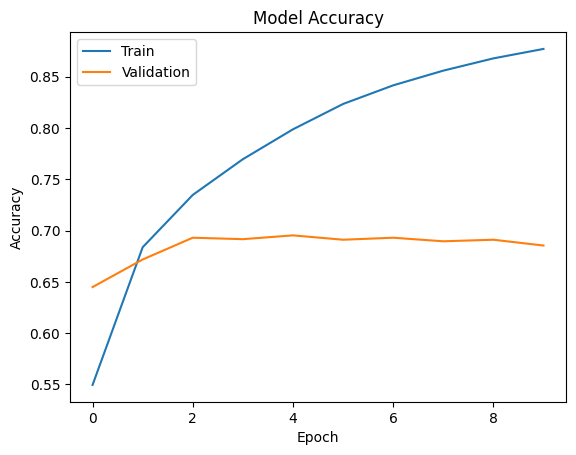

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()